In [0]:
import numpy as np
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt


In [0]:
class UniveriateLinearRegression:

  def __init__(self):
    self.theta_0 = None
    self.theta_1 = None

  def hypothesis(self,x):
    return self.theta_0 + self.theta_1*x

  def grad_theta_0 (self,x,y):
    ypred = self.hypothesis(x)
    return (ypred-y)

  def grad_theta_1 (self,x,y):
    ypred = self.hypothesis(x)
    return (ypred-y)*x

  def fit(self,X,Y,epochs=1,learning_rate=.01):

    self.theta_0 = 0.0
    self.theta_1 = 0.0
    m = X.shape[0]
    for i in range(epochs):
      dtheta_0 = 0.0
      dtheta_1 = 0.0
      for x,y in zip(X,Y):
        dtheta_0 = dtheta_0 + self.grad_theta_0(x,y)
        dtheta_1 = dtheta_1 + self.grad_theta_1(x,y)
      self.theta_0 = self.theta_0 - learning_rate * dtheta_0 / m
      self.theta_1 = self.theta_1 - learning_rate * dtheta_1 / m

  def predict(self,X):
    y_pred = []
    for x in X:
      y_pred.append(self.hypothesis(x))
    return np.array(y_pred)


In [0]:
data = np.loadtxt(open("data_train_sv.csv","rb"),delimiter = ",")
X_train = data[:,0]
Y_train = data[:,1]
X_train = X_train.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)

In [0]:
model = UniveriateLinearRegression()

In [0]:
model.fit(X_train,Y_train,epochs=40000,learning_rate=.001)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [0]:
data_test = np.loadtxt(open("data_test_sv.csv","rb"),delimiter = ",")
X_test = data_test[:,0]
Y_test = data_test[:,1]
X_test = X_test.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

In [0]:
Y_pred = model.predict(X_test)

In [0]:
error = mean_squared_error(Y_pred,Y_test)
print(error)

6.594489927524711


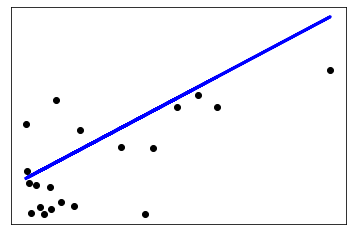

In [0]:
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()